# Exercises on Lattice-Based Cryptography

In [1]:
import ggh, lwe, ntru, lll
import matplotlib.pyplot as plt
import time

### Exercise 1. Evaluate the performance of the GGH/HNF Cryptosystem for different parameters

**Parameters**
- **n:** Dimension of the keys present in the key pair.
- **tn:** Number of evaluations to perform in each dimension. 

In [ ]:
# Define the parameters for the test batch
batch = [(n, [], [], [], [], []) for n in range(1, 129)]
trials = 10

In [9]:
# Perform the evaluations
for (n, l, ml, kl, tl, mtl) in batch:
    
    # Encryption trials
    for _ in range(trials):
        
        # Start timing for key generation
        ggh_key_start = time.process_time() * 1000
        
        # Generate the key pair
        key_pair = ggh.ggh_generate_key_pair(n)
        
        # End timing for key generation
        ggh_key_end = time.process_time() * 1000
        
        # Generate the secret vector
        r = ggh.ggh_generate_secret_vector(n)
        
        # Encrypt the secret vector
        c = ggh.ggh_encrypt(key_pair[1], r)
        
        # Start timing for GGH decryption
        ggh_start = time.process_time() * 1000
        
        # Decrypt the secret vector with private key
        d = ggh.ggh_decrypt(key_pair[0], c)
        
        # End timing for GGH decryption
        ggh_end = time.process_time() * 1000
        
        # Start timing for LLL attack
        lll_start = time.process_time() * 1000
        
        # Generate the attack key
        attack_key = lll.lll_reduce_matrix(m = key_pair[1])
        
        # Decrypt the secret vector with attack key
        a = ggh.ggh_decrypt(attack_key, c)
        
        # End timing for LLL attack
        lll_end = time.process_time() * 1000
        
        # Save the results for statistical purposes
        l.append(r == d)
        ml.append(r == a)
        kl.append(ggh_key_end - ggh_key_start)
        tl.append(ggh_end - ggh_start)
        mtl.append(lll_end - lll_start)

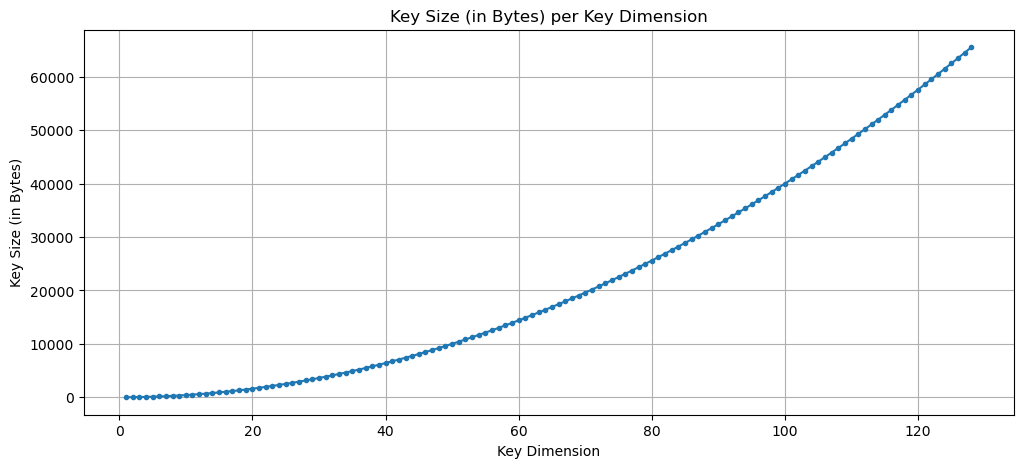

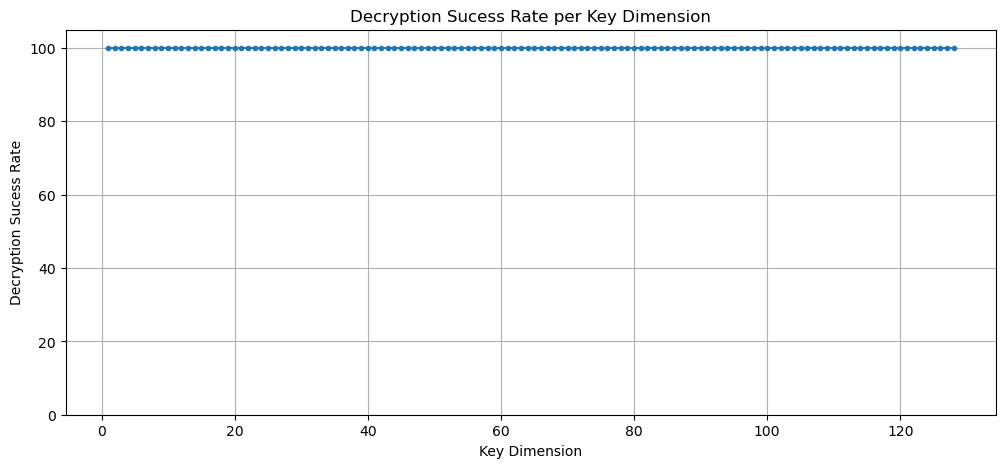

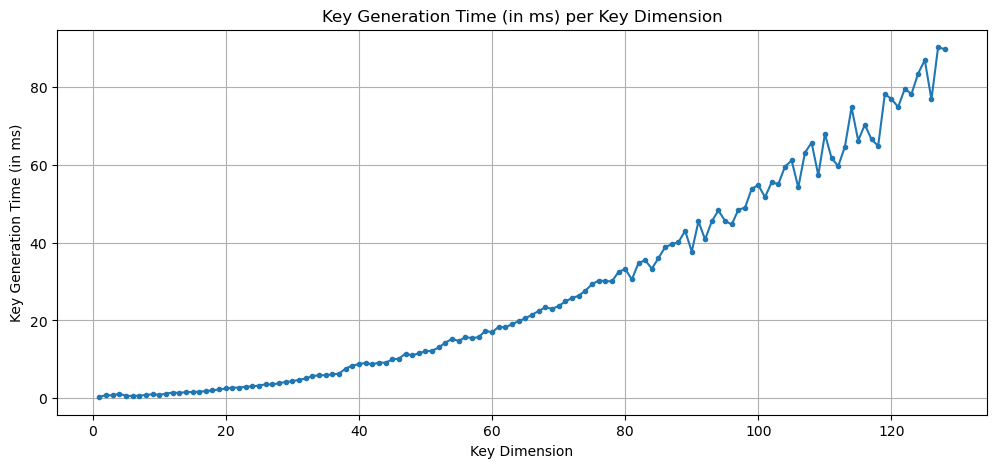

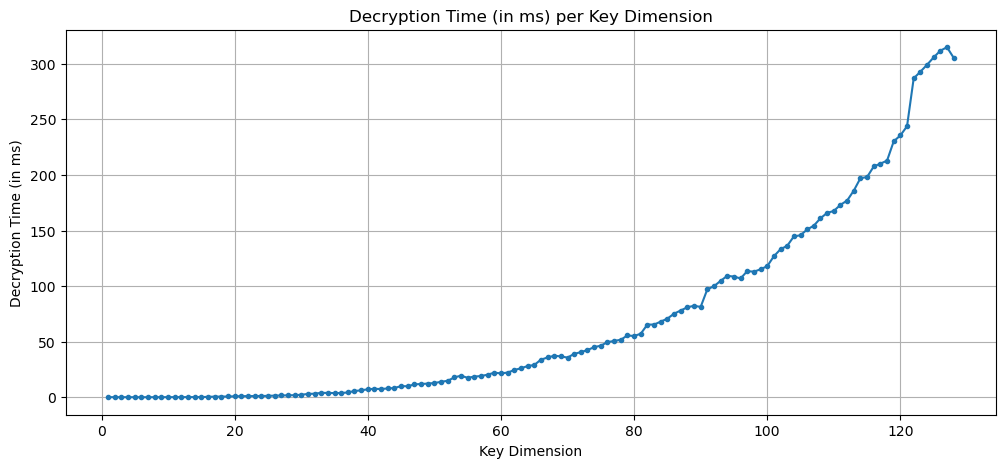

In [10]:
# Calculate the axis arrays
x = [n for (n, _, _, _, _, _) in batch]
y_1 = [n*n*4 for n in x]
y_2 = [(sum(l) / len(l)) * 100 for (_, l, _, _, _, _) in batch]
y_3 = [(sum(kl) / len(kl)) for (_, _, _, kl, _, _) in batch]
y_4 = [(sum(tl) / len(tl)) for (_, _, _, _, tl, _) in batch]

# Define the plot to show key sizes depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_1, marker='.')
plt.title("Key Size (in Bytes) per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("Key Size (in Bytes)")
plt.grid(True)
plt.show()

# Define the plot to show decryption sucess rate depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_2, marker='.')
plt.title("Decryption Sucess Rate per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("Decryption Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show key generation time depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_3, marker='.')
plt.title("Key Generation Time (in ms) per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("Key Generation Time (in ms)")
plt.grid(True)
plt.show()

# Define the plot to show decryption time depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_4, marker='.')
plt.title("Decryption Time (in ms) per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("Decryption Time (in ms)")
plt.grid(True)
plt.show()

### Exercise 2. Analysis of how LLL can be used to attack GGH/HNF cryptosystem

**Parameters**
- **n:** Dimension of the keys present in the key pair.
- **tn:** Number of evaluations to perform in each dimension.

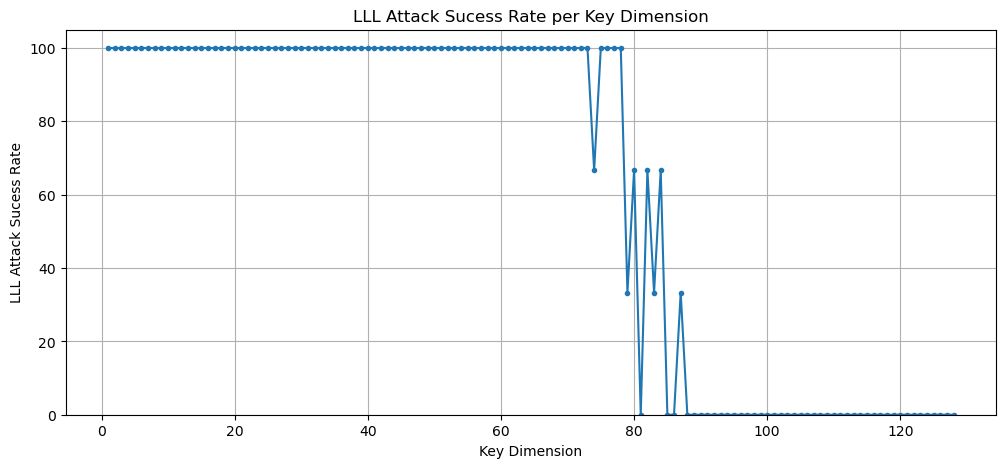

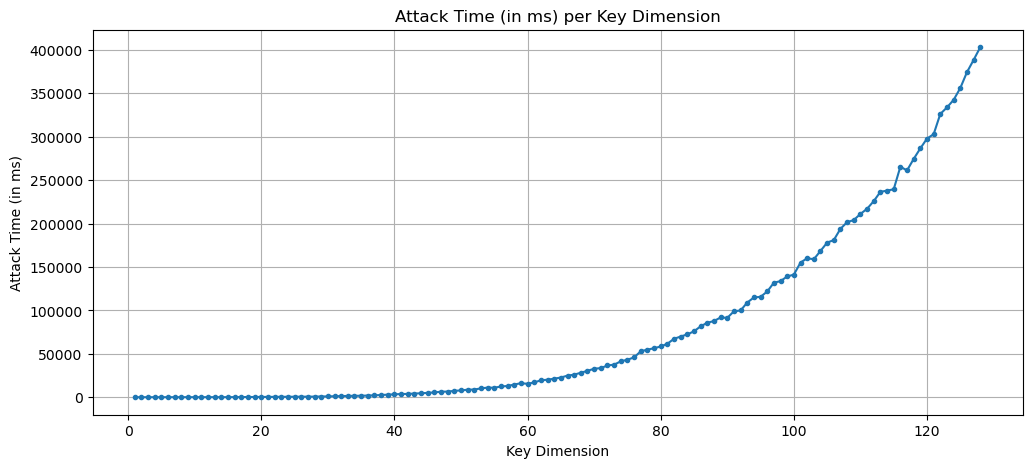

In [11]:
# Calculate the axis arrays
x = [n for (n, _, _, _, _, _) in batch]
y_1 = [(sum(l) / len(l)) * 100 for (_, _, l, _, _, _) in batch]
y_2 = [(sum(tl) / len(tl)) * 100 for (_, _, _, _, _, tl) in batch]

# Define the plot to show LLL attack sucess rate depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_1, marker='.')
plt.title("LLL Attack Sucess Rate per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("LLL Attack Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show attack time depending on n dimension
plt.figure(figsize=(12,5))
plt.plot(x, y_2, marker='.')
plt.title("Attack Time (in ms) per Key Dimension")
plt.xlabel("Key Dimension")
plt.ylabel("Attack Time (in ms)")
plt.grid(True)
plt.show()

### Exercise 3. Analysis of the LLL attack in NTRU cryptosystem

**Parameters**
- **n:** Deegree of the key polynomials.
- **p:** Small modulus.
- **q:** Large modulus.
- **df:** Number of non-zero coefficients in the private key polynomial.
- **tn:** Number of evaluations to perform for each parameter set.

In [ ]:
# Define the parameters for the test batch
batch = [((152, 3, 8, 27), [], [], [], [], []),
         ((257, 3, 10, 77), [], [], [], [], []),
         ((449, 3, 8, 24), [], [], [], [], []),
         ((797, 3, 10, 84), [], [], [], [], [])]
trials = 10

# Parameters sets too big to run for NTRU
# ((14303, 3, 8, 26), [], [])

In [13]:
# Perform the evaluations
for (p, l, ml, kl, tl, mtl) in batch:
    
    # Encryption trials
    for _ in range(trials):
        
        # Generate the parameter pair
        params = ntru.ntru_generate_parameters(p[0], p[1], p[2], p[3])
        
        # Start timing for key generation
        ntru_key_start = time.process_time() * 1000
        
        # Generate the key pair
        key_pair = ntru.ntru_generate_key_pair(params[0], params[1], params[2], params[3])
        
        # End timing for key generation
        ntru_key_end = time.process_time() * 1000
        
        # Generate the secret vector
        m = ntru.ntru_generate_random_vector(params[0], params[3])
        
        # Encrypt the secret vector
        c = ntru.ntru_encapsulation(m, key_pair[1], params[0], params[1], params[2], params[3])
        
        # Start timing for NTRU decryption
        ntru_start = time.process_time() * 1000
        
        # Decrypt the secret vector with private key
        d = ntru.ntru_decapsulation(c, params[1], params[2], f = key_pair[0])
        
        # End timing for NTRU decryption
        ntru_end = time.process_time() * 1000
        
        # Start timing for LLL attack
        lll_start = time.process_time() * 1000
        
        # Generate the attack key
        attack_key = lll.lll_reduce_matrix(f = key_pair[1])
        
        # Check for if attack is possible
        attack = True
        
        # Decrypt the secret vector with attack key
        try:
            a = ntru.ntru_decapsulation(c, params[1], params[2], Tf = attack_key)
        except ZeroDivisionError:
            attack = False
            
        # End timing for LLL attack
        lll_end = time.process_time() * 1000
        
        # Save the results for statistical purposes
        l.append(m == d)
        ml.append(attack and m == a)
        kl.append(ntru_key_end - ntru_key_start)
        tl.append(ntru_end - ntru_start)
        mtl.append(lll_end - lll_start)

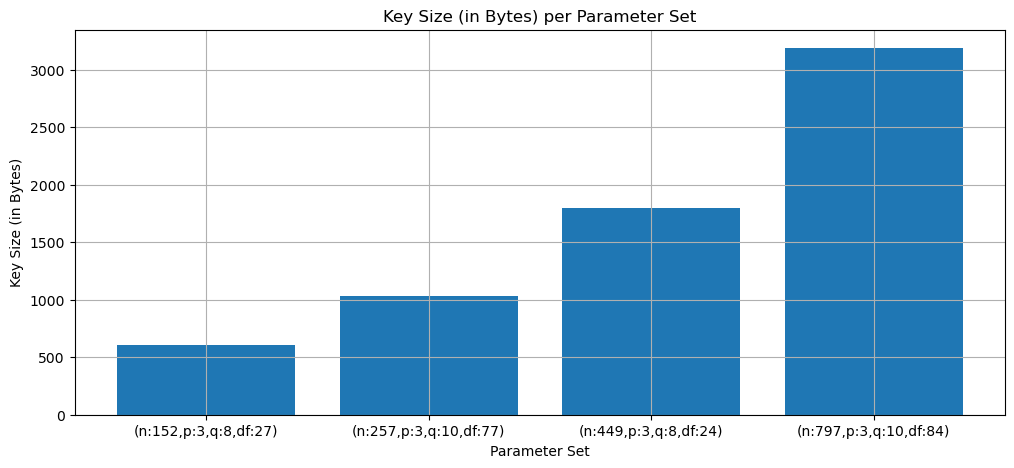

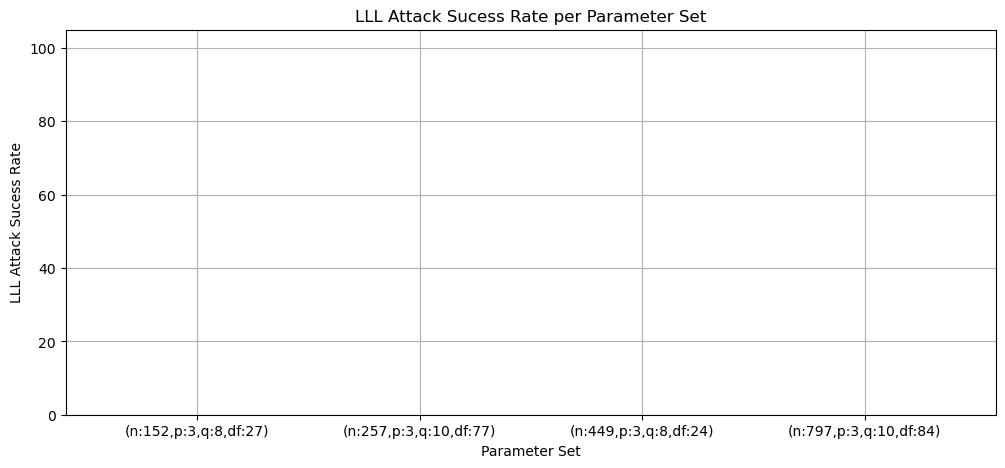

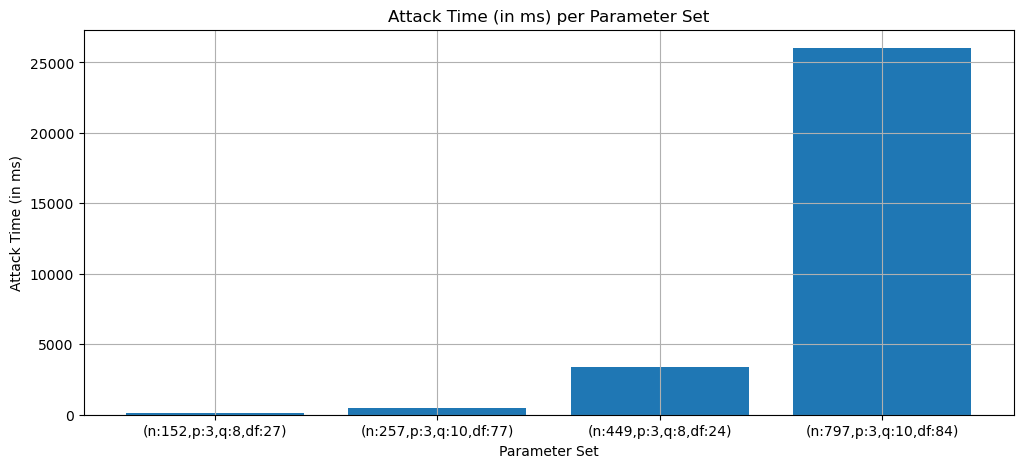

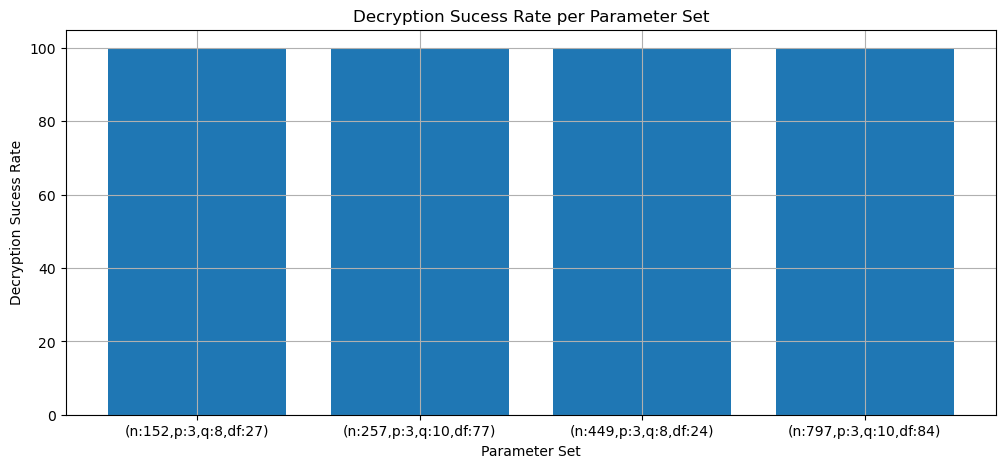

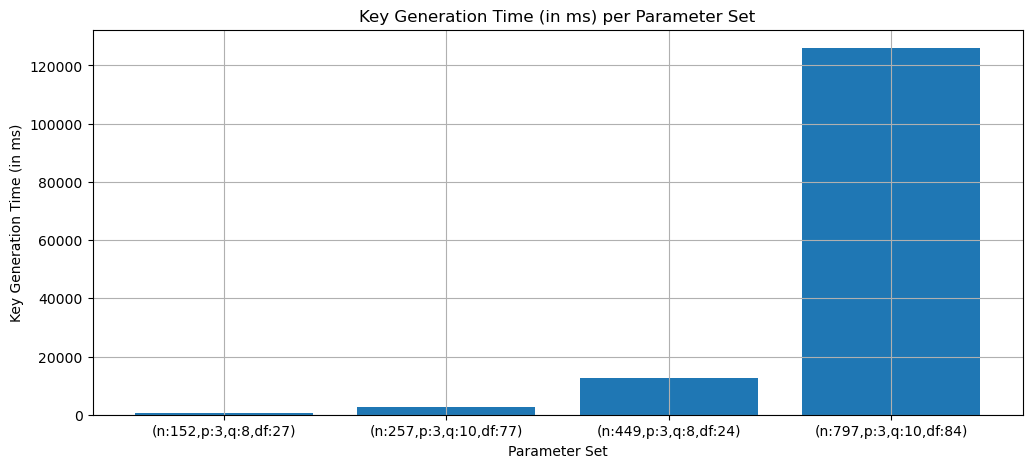

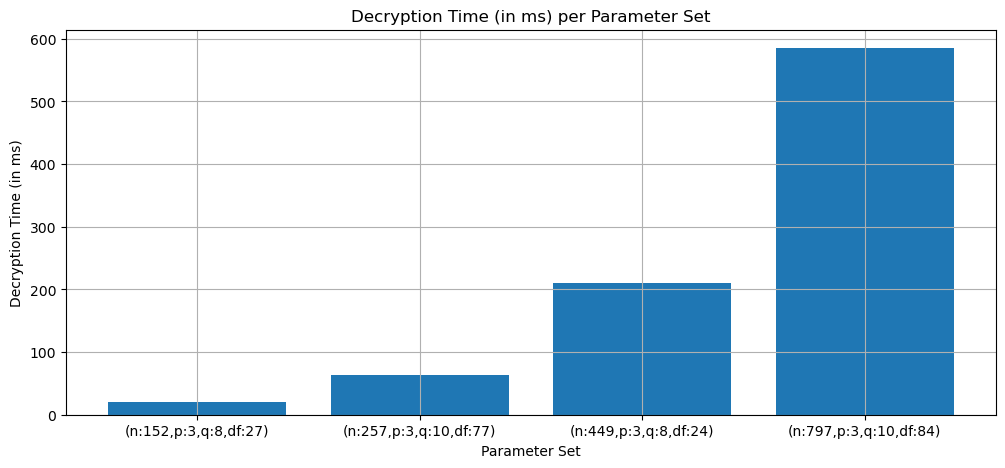

In [16]:
# Calculate the axis arrays
x = [f"(n:{p[0]},p:{p[1]},q:{p[2]},df:{p[3]})" for (p, _, _, _, _, _) in batch]
y_1 = [n*4 for ((n, _, _, _), _, _, _, _, _) in batch]
y_2 = [(sum(ml) / len(ml)) * 100 for (_, _, ml, _, _, _) in batch]
y_3 = [(sum(l) / len(l)) * 100 for (_, l, _, _, _, _) in batch]
y_4 = [(sum(kl) / len(kl)) for (_, _, _, kl, _, _) in batch]
y_5 = [(sum(tl) / len(tl)) for (_, _, _, _, tl, _) in batch]
y_6 = [(sum(mtl) / len(mtl)) for (_, _, _, _, _, mtl) in batch]

# Define the plot to show LLL attack sucess rate depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_1)
plt.title("Key Size (in Bytes) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Key Size (in Bytes)")
plt.grid(True)
plt.show()

# Define the plot to show LLL attack sucess rate depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_2)
plt.title("LLL Attack Sucess Rate per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("LLL Attack Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show attack time depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_6)
plt.title("Attack Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Attack Time (in ms)")
plt.grid(True)
plt.show()

# Define the plot to show decryption sucess rate depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_3)
plt.title("Decryption Sucess Rate per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show key generation time depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_4)
plt.title("Key Generation Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Key Generation Time (in ms)")
plt.grid(True)
plt.show()

# Define the plot to show decryption time depending on parameter set
plt.figure(figsize=(12,5))
plt.bar(x, y_5)
plt.title("Decryption Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Time (in ms)")
plt.grid(True)
plt.show()

### Exercise 4. Analysis of performance of the LWE cryptosystem as a KEM

**Parameters**
- **n:** Dimension of the secret vector.
- **l:** Length of the message vector.
- **m:** Number of samples.
- **q:** Modulus.
- **r:** Some parameter r.
- **t:** Some parameter t.
- **a:** Standard deviation for error distribution.
- **tn:** Number of evaluations to perform for each parameter set.

In [3]:
# Define the parameters for the test batch
batch = [
    ((136, 136, 2008, 2003, 1, 2, 0.0065), [], [], []),
    ((166, 166, 1319, 4093, 4, 2, 0.0024), [], [], []),
    ((192, 192, 1500, 8191, 5, 4, 0.0009959), [], [], []),
    ((214, 214, 1333, 16381, 12, 4, 0.00045), [], [], []),
    ((233, 233, 1042, 32749, 59, 2, 0.000217), [], [], []),
    ((233, 233, 4536, 32749, 1, 40, 0.000217), [], [], []),
]
trials = 100

In [4]:
# Perform the evaluations
for (p, l, kl, tl) in batch:
    
    # Encryption trials
    for _ in range(trials):
        
        # Generate the parameter pair
        params = lwe.lwe_encapsulate_parameters(p[0], p[2], p[1], p[5], p[4], p[3])
        
        # Start timing for key generation
        lwe_key_start = time.process_time() * 1000
        
        # Generate the key pair
        key_pair = lwe.lwe_generate_key_pair(params, p[6])
        
        # End timing for key generation
        lwe_key_end = time.process_time() * 1000
        
        # Generate the secret vector
        m = lwe.lwe_generate_random_vector(params)
        
        # Encrypt the secret vector
        ct = lwe.lwe_encrypt(m, key_pair[1], params)
        
        # Start timing for decryption
        lwe_start = time.process_time() * 1000
        
        # Decrypt the secret vector with private key
        d = lwe.lwe_decrypt(ct, key_pair[0], params)
        
        # End timing for decryption
        lwe_end = time.process_time() * 1000
        
        # Save the results for statistical purposes
        l.append(m == d)
        kl.append(lwe_key_end - lwe_key_start)
        tl.append(lwe_end - lwe_start)

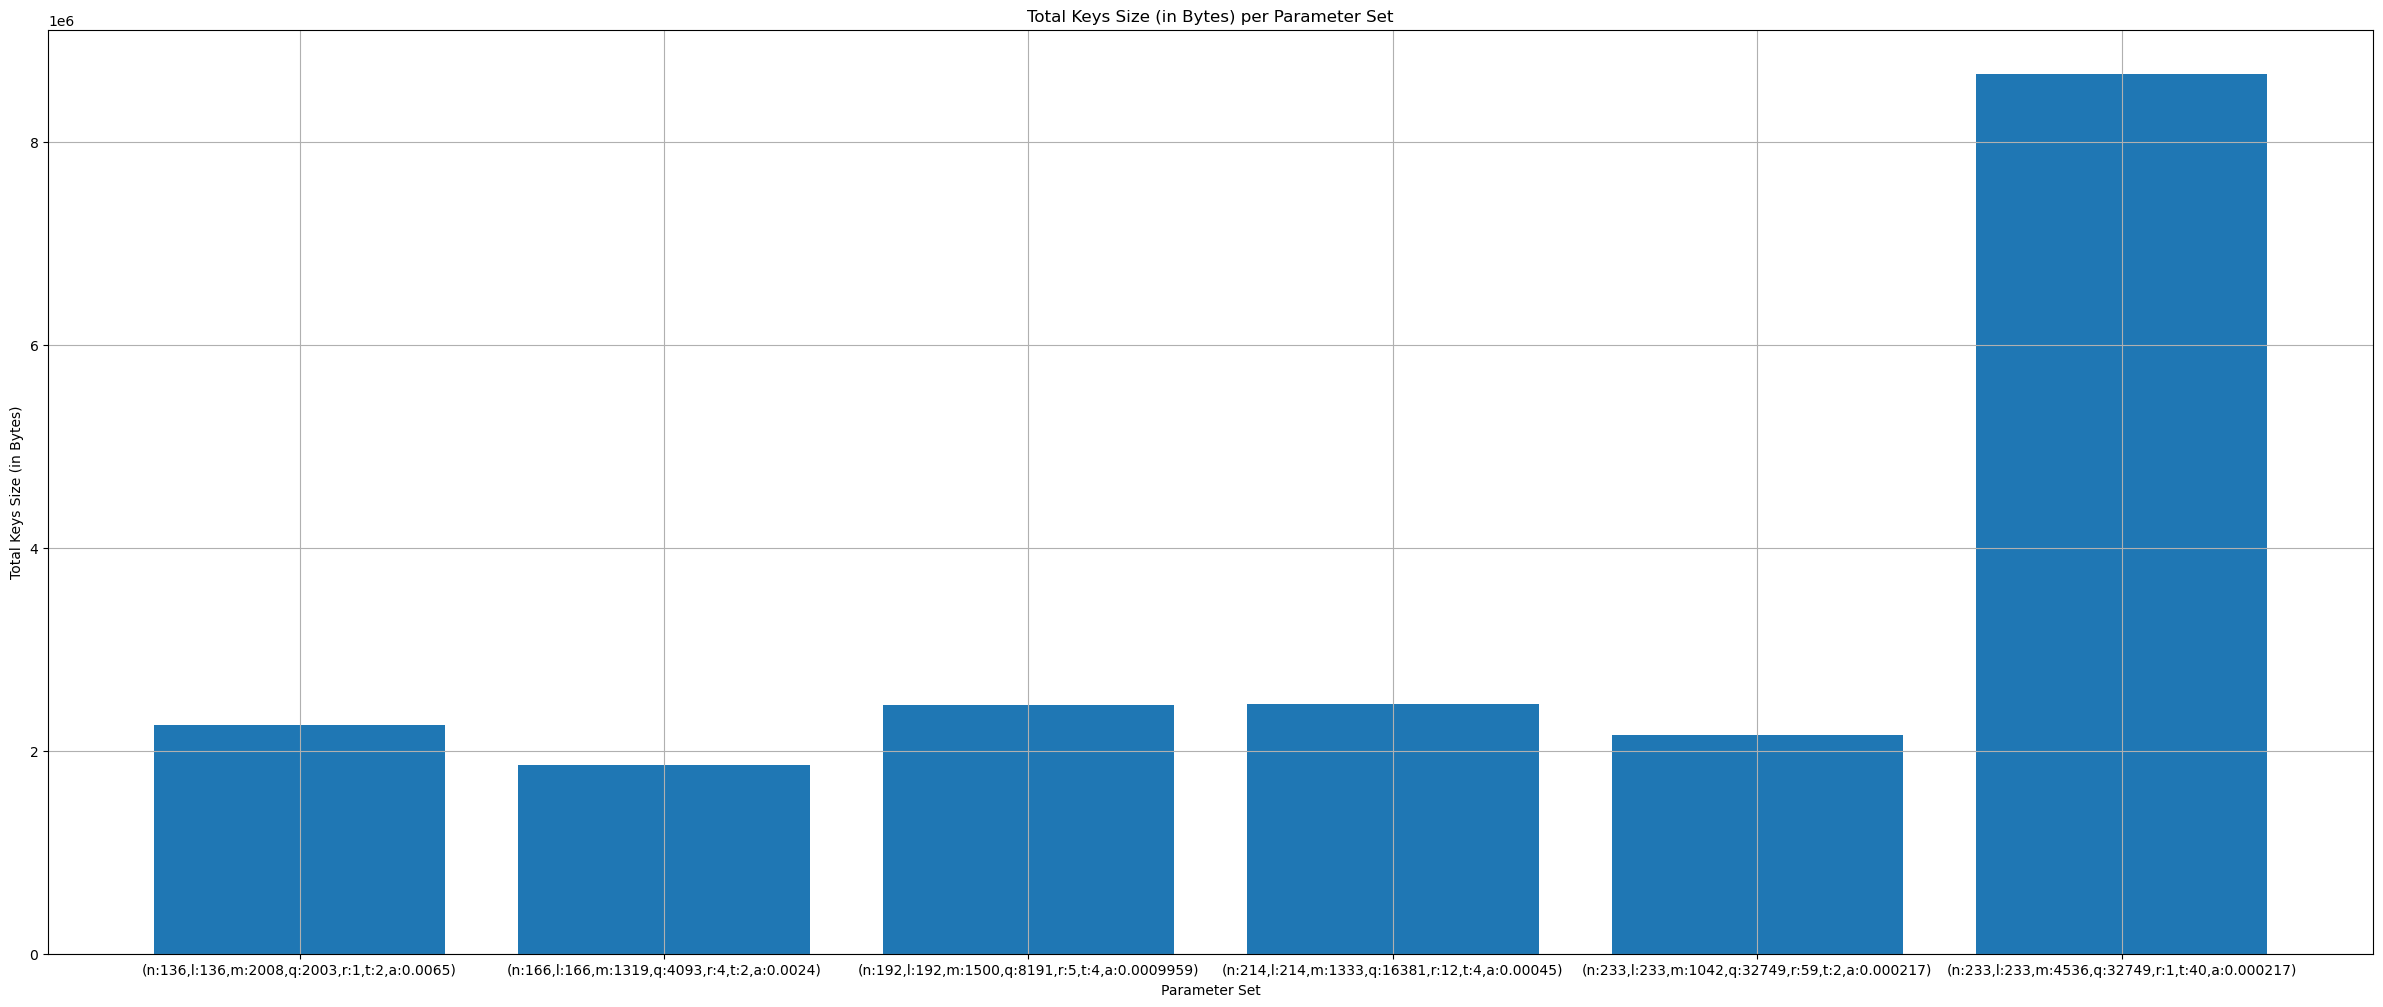

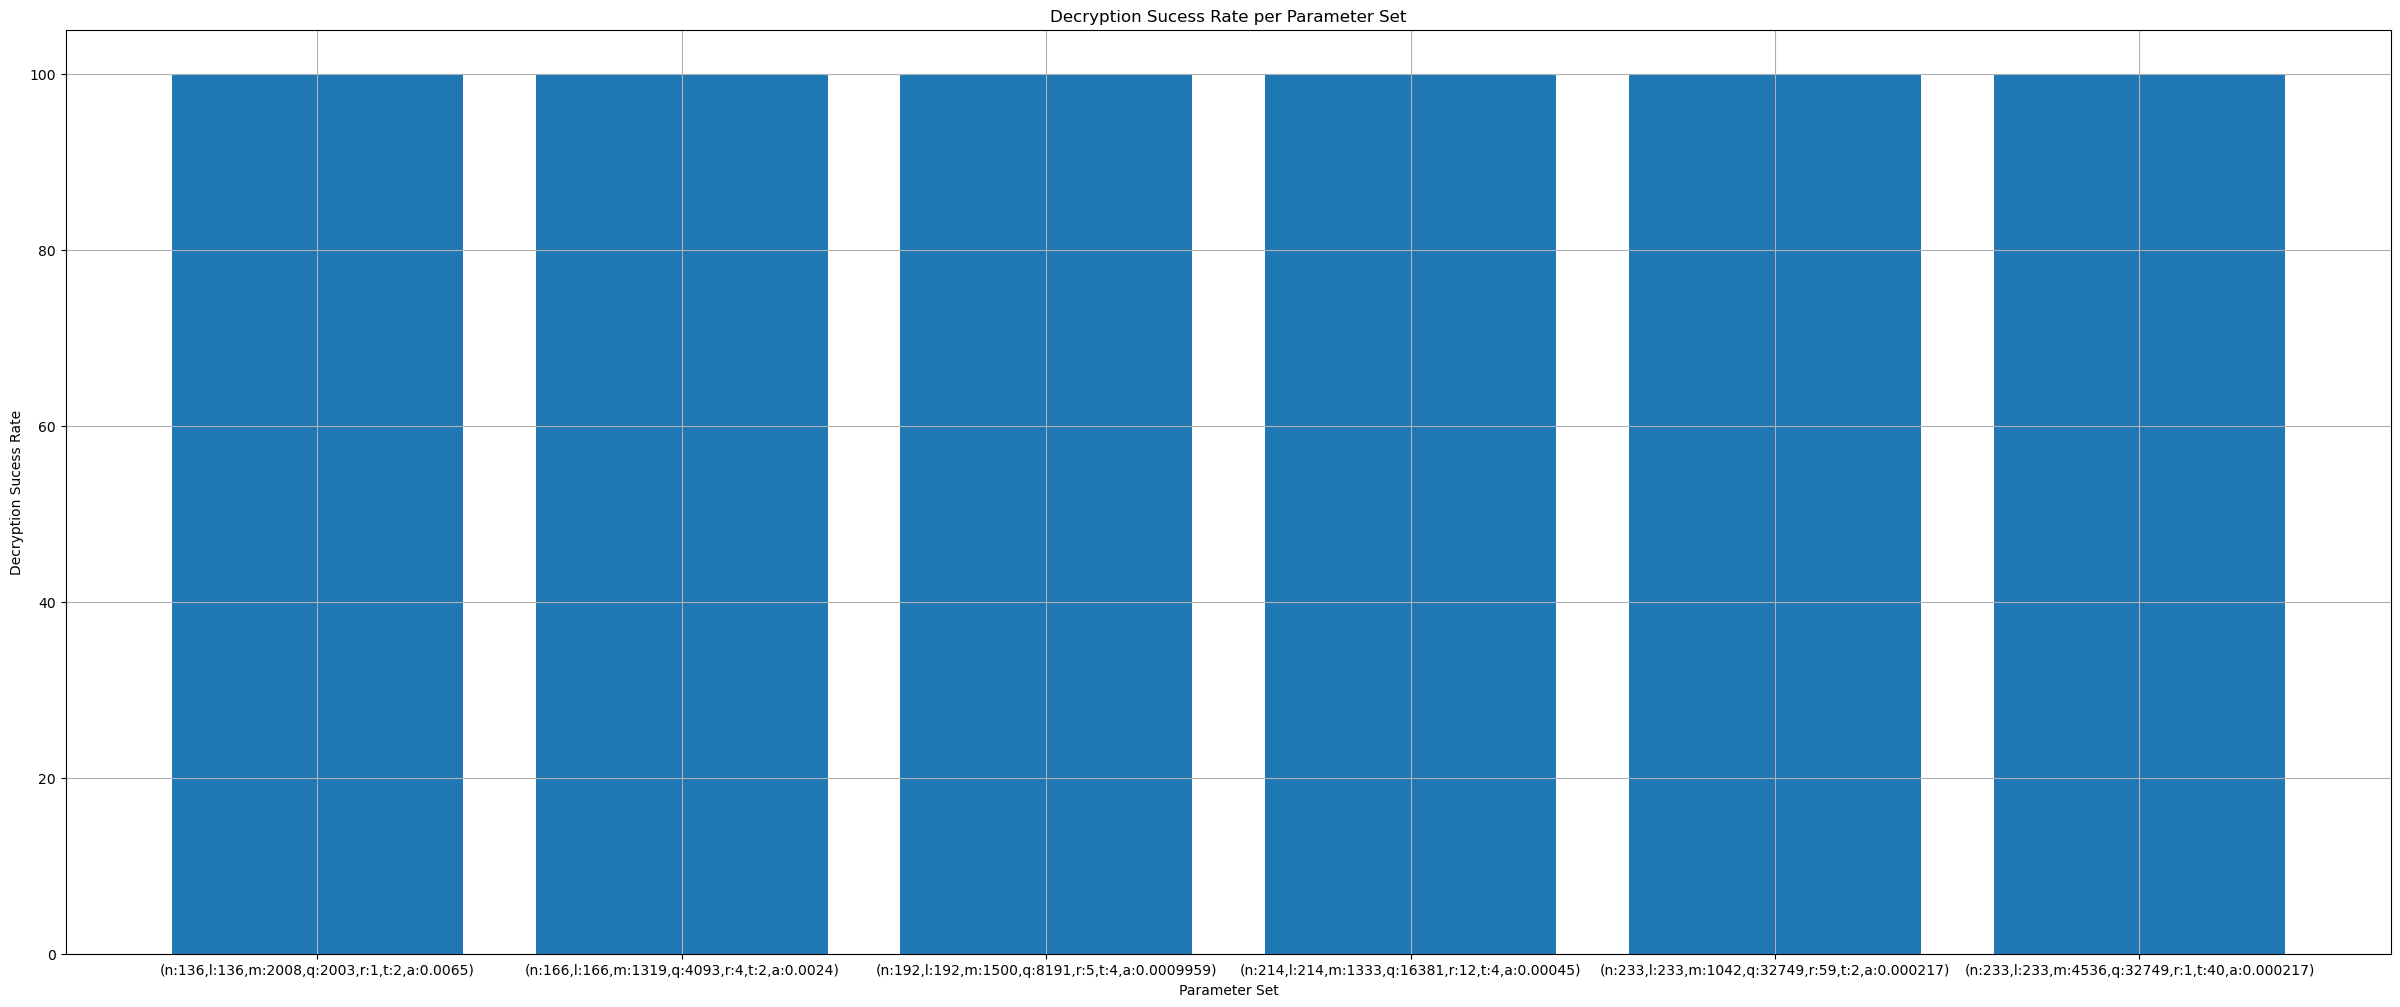

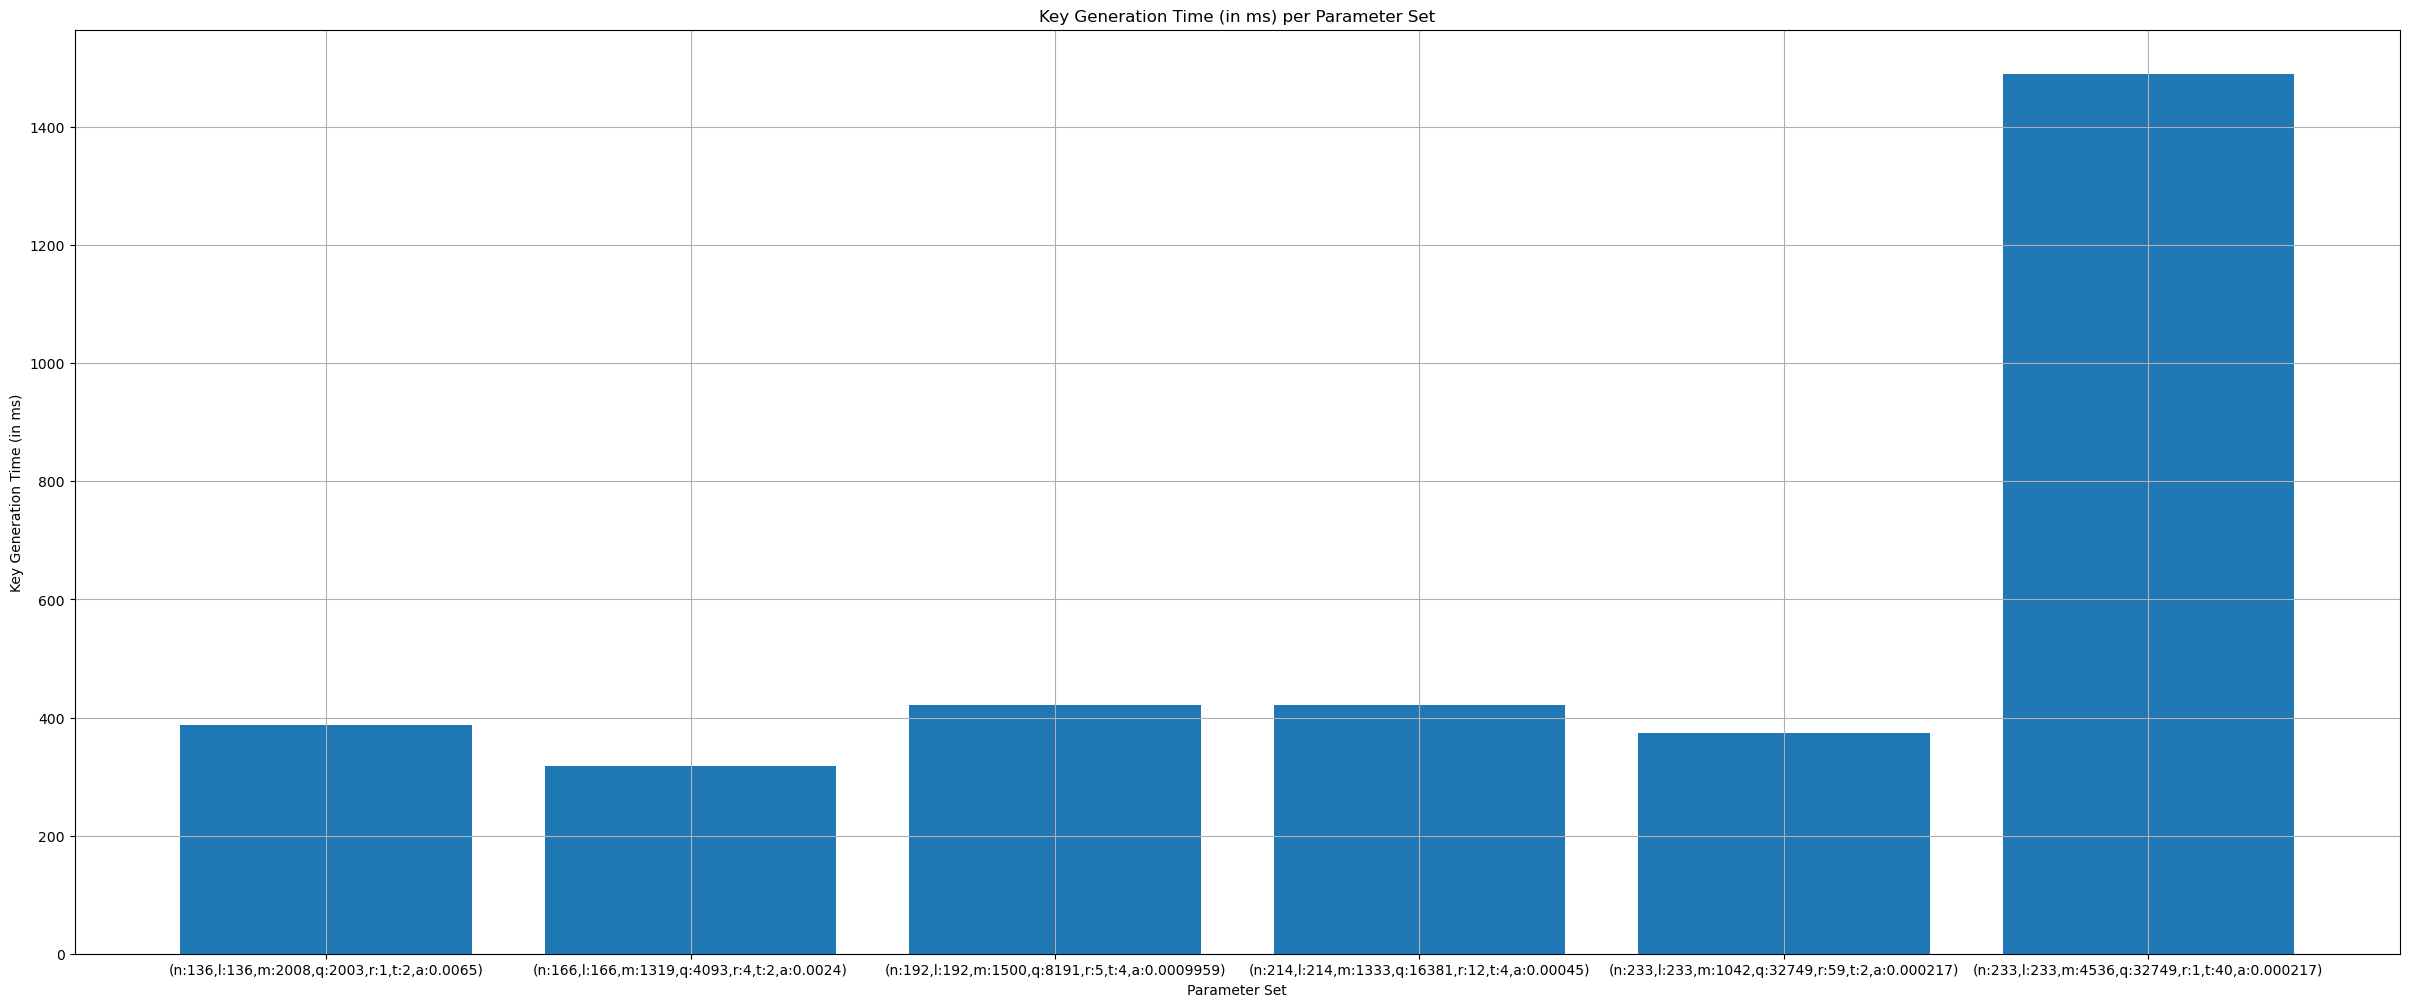

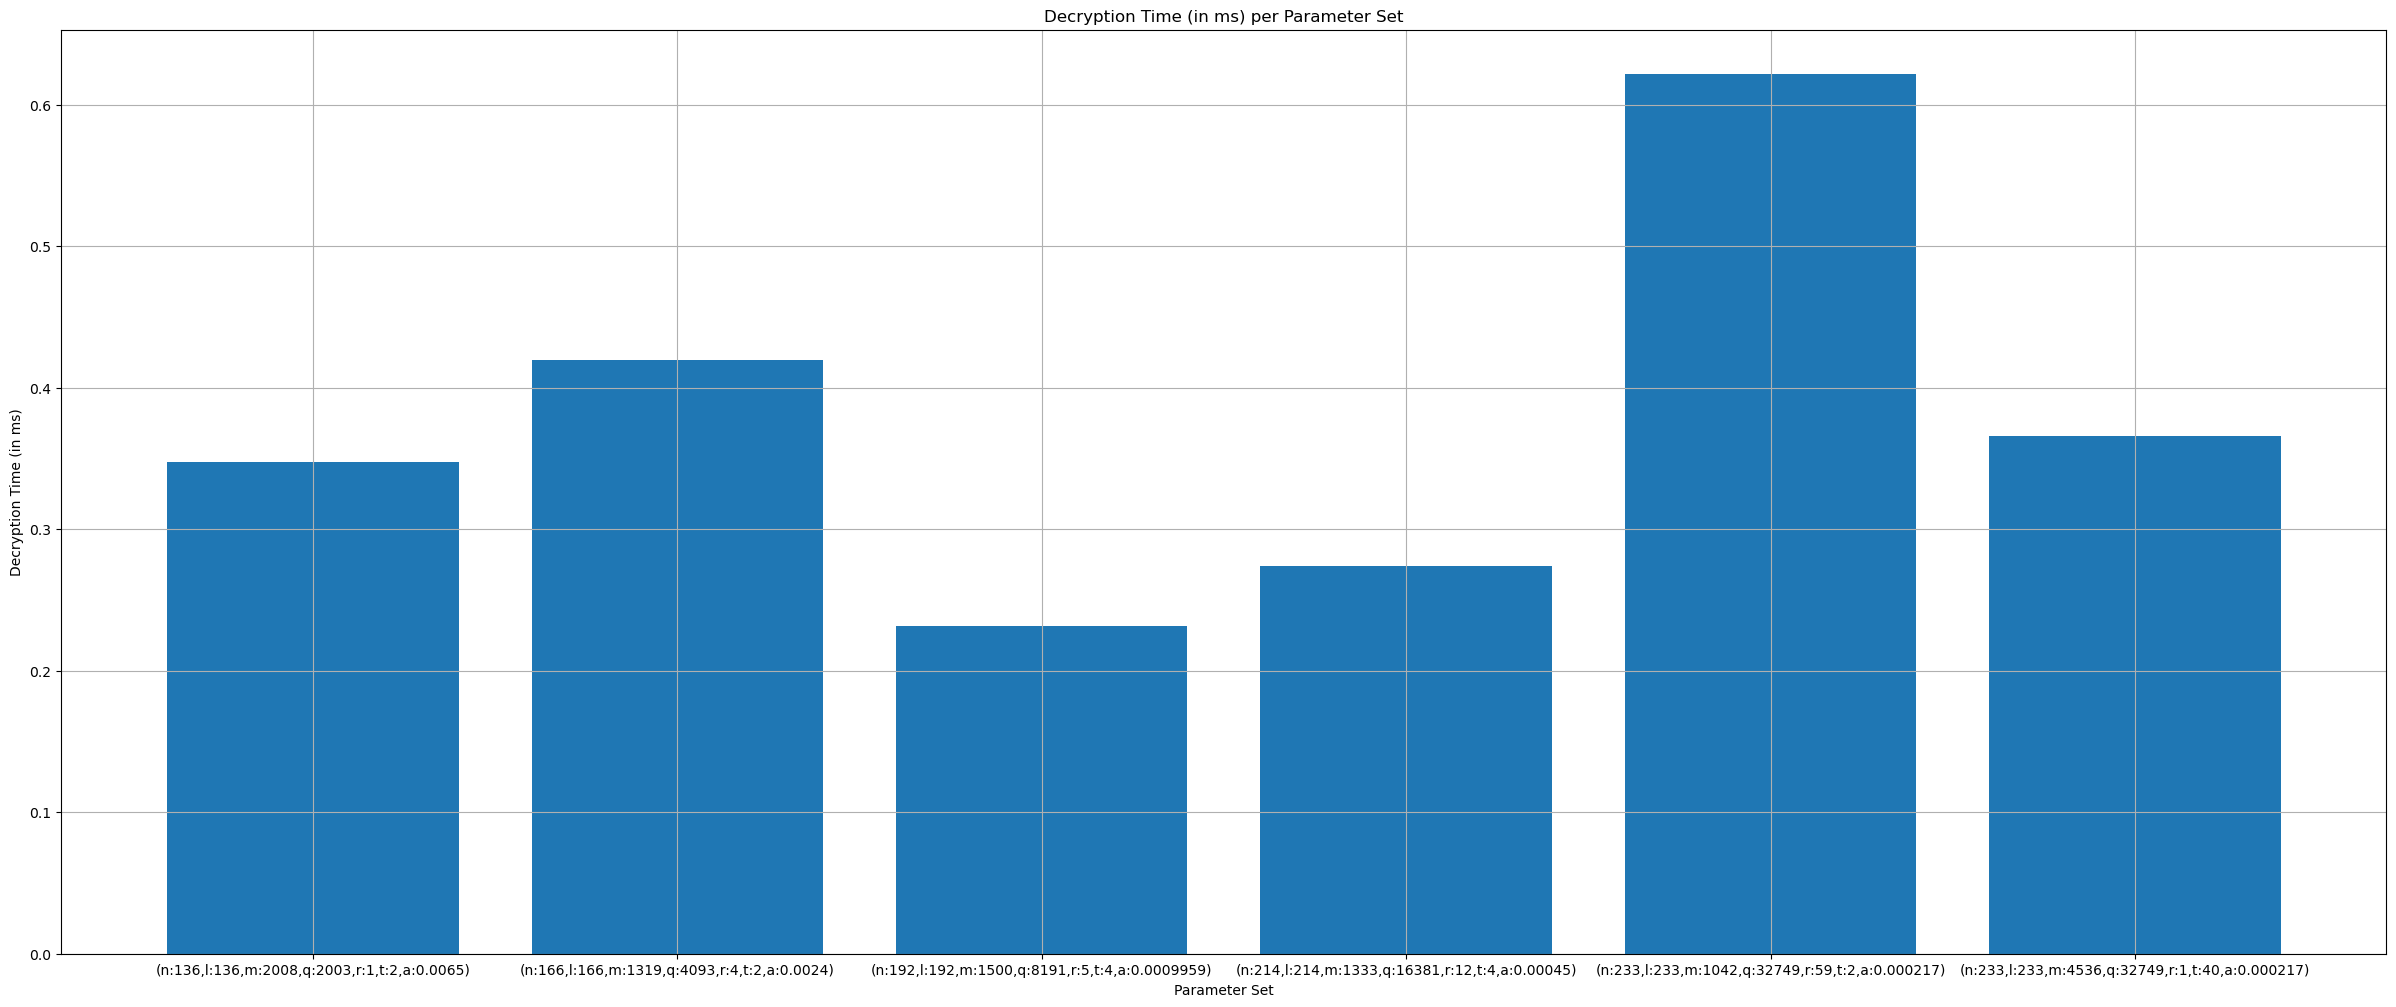

In [5]:
# Calculate the axis arrays
x = [f"(n:{p[0]},l:{p[1]},m:{p[2]},q:{p[3]},r:{p[4]},t:{p[5]},a:{p[6]})" for (p, _, _, _) in batch]
y_1 = [n*l*4 + n*m*4 + l*m*4 for ((n, l, m, q, r, t, a), _, _, _) in batch]
y_2 = [(sum(l) / len(l)) * 100 for (_, l, _, _) in batch]
y_3 = [(sum(kl) / len(kl)) for (_, _, kl, _) in batch]
y_4 = [(sum(tl) / len(tl)) for (_, _, _, tl) in batch]

# Define the plot to show LLL attack sucess rate depending on parameter set
plt.figure(figsize=(30,12))
plt.bar(x, y_1)
plt.title("Total Keys Size (in Bytes) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Total Keys Size (in Bytes)")
plt.grid(True)
plt.show()

# Define the plot to show decryption sucess rate depending on parameter set
plt.figure(figsize=(30,12))
plt.bar(x, y_2)
plt.title("Decryption Sucess Rate per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Sucess Rate")
plt.ylim(0, 105)
plt.grid(True)
plt.show()

# Define the plot to show key generation time depending on parameter set
plt.figure(figsize=(30,12))
plt.bar(x, y_3)
plt.title("Key Generation Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Key Generation Time (in ms)")
plt.grid(True)
plt.show()

# Define the plot to show decryption time depending on parameter set
plt.figure(figsize=(30,12))
plt.bar(x, y_4)
plt.title("Decryption Time (in ms) per Parameter Set")
plt.xlabel("Parameter Set")
plt.ylabel("Decryption Time (in ms)")
plt.grid(True)
plt.show()